In [1]:
cd ~/work/patents

/media/Solid/data/patents


In [85]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
run -i analyze_panel.py

In [36]:
from mectools import data
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [147]:
# aggregation leve
datf = datf_year.copy()
# datf = datf.query('rnd_total > 0')
datf = datf.query('n_citing_total > 0')

# datf = datf_period.copy()
# datf = datf.query('rnd_total > 0')
# datf = datf.query('active == 5 and active_next == 5')

print(len(datf))

233682


In [148]:
# linear formulation at period level
datf_reg = datf[['n_citing_next', 'rnd', 'revenue']]
datf_log = data.log(datf_reg).add_prefix('log_')
datf_reg = datf_reg.join(datf_log)
ret = smf.ols('n_citing_next ~ rnd', data=datf_reg).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          n_citing_next   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     339.6
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           3.44e-74
Time:                        16:18:19   Log-Likelihood:                -63281.
No. Observations:                7437   AIC:                         1.266e+05
Df Residuals:                    7435   BIC:                         1.266e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     90.9137     14.496      6.272      0.000      62.498     119.329
rnd            0.3569      0.019     18.428      0.000       0.319       0.395
==============================================================================
Omnibus:                    13967.654   Durbin-Watson:                   0.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21310990.197
Skew:                          14.383   Prob(JB):                         0.00
Kurtosis:                     263.663   Cond. No.                         780.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
# log(1+x) formulation at period level
datf_reg = datf[['n_citing_next', 'rnd', 'revenue']]
datf_log = data.log(100+datf_reg).add_prefix('log_')
datf_reg = datf_reg.join(datf_log)
ret = smf.ols('log_n_citing_next ~ log_revenue + log_rnd', data=datf_reg).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_n_citing_next   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     240.6
Date:                Mon, 12 Nov 2018   Prob (F-statistic):          5.55e-102
Time:                        16:18:21   Log-Likelihood:                -7601.6
No. Observations:                7437   AIC:                         1.521e+04
Df Residuals:                    7434   BIC:                         1.523e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7213      0.054     69.395      0.000       3.616       3.826
log_revenue    -0.0572      0.008     -7.567      0.000      -0.072      -0.042
log_rnd         0.2979      0.016     18.381      0.000       0.266       0.330
==============================================================================
Omnibus:                     4872.563   Durbin-Watson:                   0.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56494.060
Skew:                           3.069   Prob(JB):                         0.00
Kurtosis:                      15.026   Cond. No.                         59.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
# log(x) formulation at period level
datf_reg = datf[['n_citing_next', 'rnd']]
datf_log = data.log(datf_reg).add_prefix('log_')
datf_reg = datf_reg.join(datf_log)
ret = smf.ols('log_n_citing_next ~ log_rnd', data=datf_reg).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_n_citing_next   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     96.05
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           2.81e-22
Time:                        16:18:32   Log-Likelihood:                -5415.6
No. Observations:                2499   AIC:                         1.084e+04
Df Residuals:                    2497   BIC:                         1.085e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2930      0.082     40.134      0.000       3.132       3.454
log_rnd        0.1984      0.020      9.801      0.000       0.159       0.238
==============================================================================
Omnibus:                       48.829   Durbin-Watson:                   1.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.073
Skew:                          -0.302   Prob(JB):                     6.00e-11
Kurtosis:                       2.703   Cond. No.                         8.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
# poisson regression
datf_reg = datf[['n_citing_next', 'rnd', 'revenue']]
datf_log = data.log(datf_reg[['rnd', 'revenue']]).add_prefix('log_')
datf_reg = datf_reg.join(datf_log)
ret = smf.glm('n_citing_next ~ log_revenue + log_rnd', data=datf_reg.dropna(), family=sm.families.Poisson()).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          n_citing_next   No. Observations:                 7287
Model:                            GLM   Df Residuals:                     7284
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.6477e+06
Date:                Mon, 12 Nov 2018   Deviance:                   5.2809e+06
Time:                        16:24:32   Pearson chi2:                 1.75e+07
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.5433      0.003    900.484      0.000       2.538       2.549
log_revenue    -0.1717      0.001   -280.019      0.000      -0.173      -0.171
log_rnd         0.8152      0.001    932.084      0.000       0.813       0.817
===============================================================================
"""

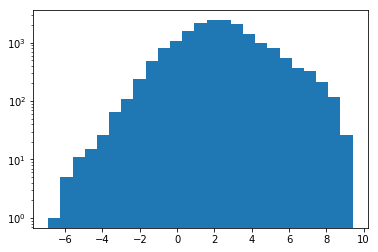

In [112]:
data.log(datf_reg['rnd']).hist(log=True, grid=False, bins=25);

In [113]:
datf_reg.query('rnd>0').rnd.median()

9.652000000000001